In [122]:
#import all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


In [123]:

df=pd.read_csv(r"C:\Users\Arun Dominic Savio\Documents\Aman\archive (7)\Credit.csv")

In [124]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [125]:
#we can drop the column "isFlaggedFraud" which is of no use
df=df.drop("isFlaggedFraud",axis=1)

In [126]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1


In [127]:
#we can check the numder of rows and columns
df.shape

(6362620, 10)

In [128]:
#checking the presence of null values
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [129]:
#here there is no null values present in columns

In [130]:
#we can check the data type of each variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 485.4+ MB


In [131]:
#the statistical description of each variable
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00


In [132]:
df["type"].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

<Axes: >

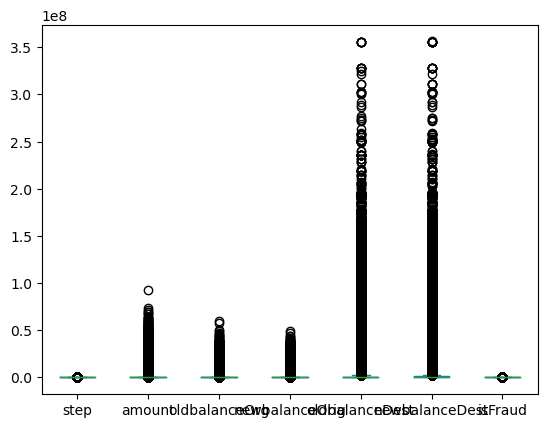

In [135]:
#we can plot the box plot to identify the data distribution of all the numeric variables
df[["step","amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest","isFraud"]].plot(kind="box")

In [136]:
#in this box plot the there are lot of outliers are present in the variables , those variables can be considerd as Fraud transactions here

# EDA

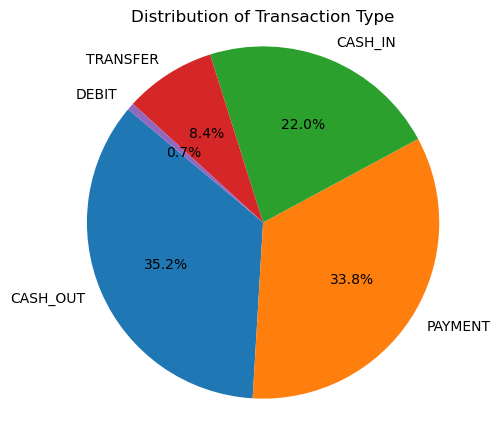

In [137]:
# we can represent the % of distribution of different transaction type using a pie chart
type = df["type"].value_counts()
transactions = type.index
quantity = type.values

# Create a pie chart
plt.figure(figsize=(5,5))
plt.pie(quantity, labels=transactions, autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Transaction Type")
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.
plt.show()


In [138]:
#In this pie chart we can see the percentage of distribution is maximum for "Cash_out"type of transactions, it involves withdrawl of cash

<Axes: xlabel='type'>

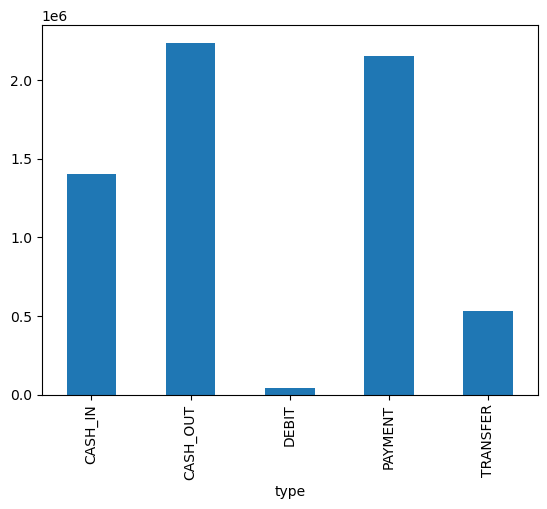

In [139]:
df.groupby("type")["isFraud"].count().plot(kind="bar")

In [140]:
#using a heatmap we can check the correlation between different variables

C:\Users\Arun Dominic Savio\AppData\Local\Temp\ipykernel_6796\190949408.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr=df.corr()


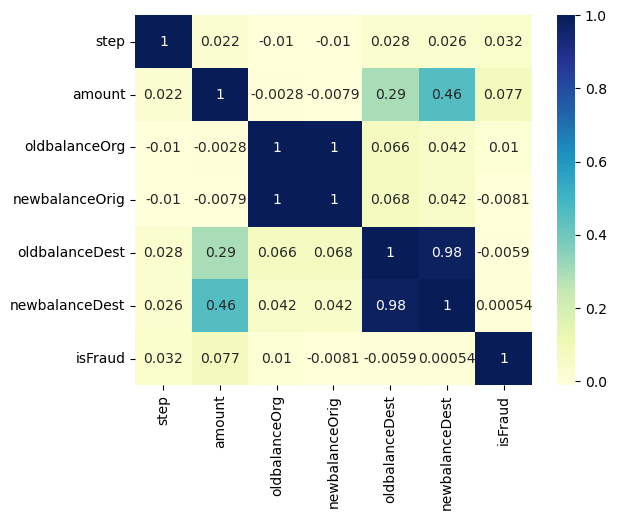

In [141]:
df_corr=df.corr()
sns.heatmap(df_corr,annot=True,cmap='YlGnBu')
plt.show()

In [142]:
#from the heatmap it shows that there is a strong correlaton between "oldbalanceorg" and "newbalanceorig" and it is a positive correlation
#when we compare other variables the strength of correlation is very weak

In [143]:
#Now let’s transform the categorical features into numerical. 
#Here I will also transform the values of the isFraud column into No Fraud and Fraud labels to have a better understanding of the output:

In [144]:
df["type"]=df["type"].replace(['PAYMENT','TRANSFER','CASH_OUT','DEBIT','CASH_IN'],[1,2,3,4,5])


In [145]:
df["isFraud"]=df["isFraud"].replace([0,1],["No Fraud","Fraud"])

In [146]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,No Fraud
1,1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,No Fraud
2,1,2,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,Fraud
3,1,3,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,Fraud
4,1,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,No Fraud


In [147]:
#Before building the model we can split the data into train and test samples

In [148]:
x=np.array(df[["type","amount","oldbalanceOrg","newbalanceOrig"]])
y=np.array(df[["isFraud"]])

In [149]:
#here x contain all the input variables and y contain all output variables

In [150]:
x

array([[1.00000000e+00, 9.83964000e+03, 1.70136000e+05, 1.60296360e+05],
       [1.00000000e+00, 1.86428000e+03, 2.12490000e+04, 1.93847200e+04],
       [2.00000000e+00, 1.81000000e+02, 1.81000000e+02, 0.00000000e+00],
       ...,
       [3.00000000e+00, 6.31140928e+06, 6.31140928e+06, 0.00000000e+00],
       [2.00000000e+00, 8.50002520e+05, 8.50002520e+05, 0.00000000e+00],
       [3.00000000e+00, 8.50002520e+05, 8.50002520e+05, 0.00000000e+00]])

In [151]:
y

array([['No Fraud'],
       ['No Fraud'],
       ['Fraud'],
       ...,
       ['Fraud'],
       ['Fraud'],
       ['Fraud']], dtype=object)

In [152]:
#this is the cross validation technique, by splitting the data into training and test samples
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.8,random_state=0)

# Decision tree classifier

In [153]:
#We can use Decision tree classifier algorithm to build the model, to classify the fraud and legitimate transactions
from sklearn.tree import DecisionTreeClassifier
#here dtree is our classification model
dtree=DecisionTreeClassifier()


In [154]:
#train the model using the training samples
dtree.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [155]:
#we can predict the outut using the test data
y_pred=dtree.predict(xtest)

In [156]:
y_pred

array(['No Fraud', 'No Fraud', 'No Fraud', ..., 'No Fraud', 'No Fraud',
       'No Fraud'], dtype=object)

In [157]:

dtree.score(xtest,ytest)

0.9996809490430043

In [158]:
# Evaluate the model's performance
report = classification_report(ytest, y_pred)
print(report)

              precision    recall  f1-score   support

       Fraud       0.88      0.87      0.88      1641
    No Fraud       1.00      1.00      1.00   1270883

    accuracy                           1.00   1272524
   macro avg       0.94      0.94      0.94   1272524
weighted avg       1.00      1.00      1.00   1272524



In [159]:
#here the model has a score of 0.99, so it is a good performing model
# for both "No fraud" and "Fraud" class the value for precision,recall,f1 score and support are high

In [160]:
#lets check the some examples

In [161]:
#features=[type, amount, oldbalanceOrg, newbalanceOrig]
features=np.array([[5,1000.0,2900.4,0.0]])
print(dtree.predict(features))

['Fraud']
